# Resumo

O artigo propõe um sistema ALPR com foco em cenários de captura irrestrita, onde o LP pode ser consideravelmente 
distorcida devido a visualizações oblíquas.
A principal contribuição é a introdução de uma nova Rede Neural Convulocional(CNN) capaz de detectar e retificar 
múltiplas placas distorcidas em um única imagem, que é alimentada por um sistema de reconhecimento ótico de caracteres.

Contribuição adicional: apresentam anotações manuais para um conjunto desafiador de imagens LP de diferentes regiões e
condições de aquisição.

ALPR = Automatic License Plate Recognition = reconhecimento automático de placas de veículos

Uso de imagens sinteticamente distorcidas permitindo um treinamento usando menos de 200 imagens rotuladas manualmente.

### Abordagem para as LP brasileiros

treinar novamente a sua rede de OCR usando um novo conjunto de treinamento composto por uma mistura de dados reais e gerados artificialmente usando tipos de fontes semelhantes as da região-alvo.

Como resultado, a rede retreinada tornou-se muito mais robusta para detecção e classificação de personagens reais no cenário original brasileiro, mas também para LPs europeus e taiwaneses, alcançando altíssima precisão e taxas de recall. 

Todos os dados anotados utilizados para este trabalho estão disponíveis publicamente
e as imagens de referência podem ser obtidas baixando o Cars Dataset [16],
o banco de dados SSIG [6] e o conjunto de dados AOLP [10].

### Revisar abordagens relacionadas ao ALPR

In [ ]:
ALPR é a tarefa de localizar e reconhecer placas em imagens

Comumente dividida em 4 subtarefas que formam um pipeline sequencial:

1 - detecção de veículos
2 - detecção de placas
3 - segmentação de caracteres
4 - reconhecimentos de caracteres

A combinação das duas últimas = OCR

Obs: YOLO lutam para detectar objetos de pequeno porte, assim ainda mais são necessárias avaliações sobre cenários onde o carro está longe da câmera.

## O método proposto

Dada uma imagem de entrada, o primeiro módulo detecta veículos na cena. Dentro de cada região de detecção a proposta
Warped Planar Object Detection Network (WPOD-NET) procura LP e regride uma transformação afim por detecção, permitindo uma retificação da área LP em um retângulo semelhante a uma vista frontal. Estes positivos e retificados, as detecções são alimentadas em uma rede OCR para reconhecimento final de caracteres.

### Detecção de veículos

imagens de entrada maiores permitem a detecção de objetos menores, mas aumentam o custo computacional. Em vistas aproximadamente frontais/traseiras, a relação entre o tamanho da LP e a caixa delimitadora (BB) do veículo é alta.

No entanto, essa relação tende a ser muito menor para vistas oblíquas/laterais, pois a BB do veículo tende a ser maior e mais alongada

Portanto, vistas oblíquas devem ser redimensionadas para uma dimensão maior do que as frontais para manter a região da LP ainda reconhecível. Embora métodos de estimação de pose 3D, como o mencionado, possam ser usados para determinar a escala de redimensionamento, este trabalho apresenta um procedimento simples e rápido baseado na razão de aspecto da BB do veículo. Quando está próximo de um, uma dimensão menor pode ser usada, e deve ser aumentada à medida que a razão de aspecto fica maior.  

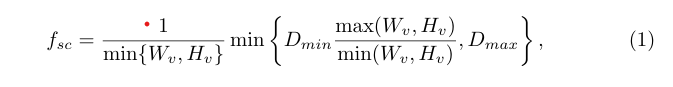

onde Wv e Hv são a largura e a altura da caixa delimitadora do veículo, respectivamente. Note que Dmin ≤ fscmin(Wv,Hv) ≤ Dmax, de modo que Dmin and Dmax delimitam o intervalo para a menor dimensão da BB redimensionada. Com base em experimentos e tentando manter um bom compromisso entre precisão e tempos de execução,selecionamos Dmin = 288 and Dmax = 608

### Detecção de placas e desdobramentos